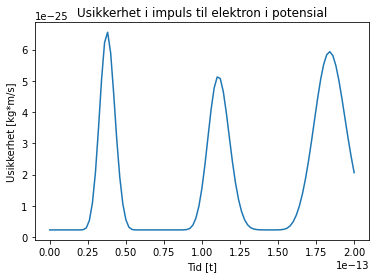

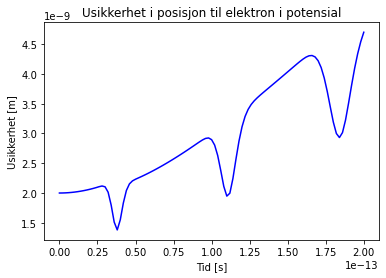

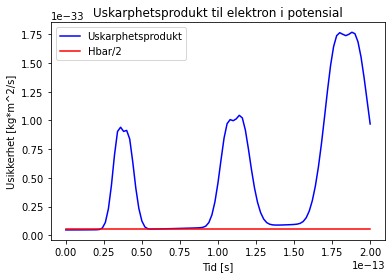

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation

#Numerisk delta_x vha hjelpekode:

hbar=1.05457168*10**(-34)
m=9.11*10**(-31)
E0=1.6*10**(-19)
p0=np.sqrt(2*m*E0)
dx=10**(-10)
k0=p0/hbar

N=100

V0=50*E0
V = [V0]*4*N + [V0*((n-N)/(N*1.0))**2 for n in range(2*N+1)] + [V0]*4*N
V = np.asarray(V)
Ntot=len(V)
#Vmax=0.00000001
x = np.asarray([dx*n for n in range(Ntot)])


d=[v+hbar**2/(m*dx**2) for v in V]
e=-hbar**2/(2*m*dx**2)
H=[[0]*(Ntot) for n in range(Ntot)]

for i in range(Ntot):
    for j in range(Ntot):
        if i==j:
            H[i][j]=d[i]
        if np.abs(i-j)==1:
            H[i][j]=e

H=np.asarray(H)
energy, psi_matrix=np.linalg.eigh(H)
#print(psi_matrix)
               
x0=2*N*dx
sigma=0.2*N*dx
normfactor=(2*np.pi*sigma**2)**(-0.25)
gaussinit=np.exp(-(x-x0)**2/(4*sigma**2))
planewavefactor=np.exp(1j*k0*x)


#Psi0=(2*np.pi*sigma**2)**(-1/2)*np.exp(-(x**2/(2*sigma**2)))
Psi0=normfactor*gaussinit*planewavefactor
psi_matrix_complex=psi_matrix*(1+0.0j)


c=np.zeros(Ntot, dtype= np.complex128)
for n in range(Ntot):
    c[n]=np.vdot(psi_matrix_complex[:,n],Psi0)


#t=np.linspace(0,10**(-13),101)
t=np.linspace(0,2*10**(-13),101)

#Beregner Psi(x,t)

def Rho(t):
    Psi_t = np.zeros(Ntot,dtype=np.complex128)
    for n in range(Ntot):
        Psi_t += c[n]*psi_matrix_complex[:,n]*np.exp(-1j*energy[n]*t/hbar)
    return (np.abs(Psi_t))**2                                                                                                         

def delta_p(t):
    Psi_t = np.zeros(Ntot,dtype=np.complex128)
    for n in range(Ntot):
        Psi_t += c[n]*psi_matrix_complex[:,n]*np.exp(-1j*energy[n]*t/hbar)
    Psi_t_complex=np.conj(Psi_t)
    Psi_t_derivative=np.gradient(Psi_t)
    Psi_t_double_derivative=np.gradient(Psi_t_derivative)
    p_complex=-1j*hbar*np.dot(Psi_t_complex, Psi_t_derivative)
    p2_complex=-hbar**2*np.dot(Psi_t_complex, Psi_t_double_derivative)
    pmean=np.real(p_complex)*dx
    p2mean=np.real(p2_complex)*dx
    return np.sqrt(p2mean-pmean**2)


#print(rho_t)

deltax_numeric=np.zeros(len(t))
teller=0
for i in t:
    x2mean = dx*np.dot(x**2,Rho(i))
    xmean2 = dx*dx*np.dot(x,Rho(i))**2
    deltax_numeric[teller] = np.sqrt(x2mean-xmean2)
    teller+=1


deltap=np.zeros(len(t))
teller=0
for i in t:
    deltap[teller] = delta_p(i)
    teller+=1


hbar_list=[hbar/2 for i in range(len(t))]




plt.figure(1)
plt.title("Usikkerhet i impuls til elektron i potensial")
plt.plot(t, deltap/dx)
plt.xlabel("Tid [t]")
plt.ylabel("Usikkerhet [kg*m/s]")

plt.figure(2)
plt.title("Usikkerhet i posisjon til elektron i potensial")
plt.plot(t, deltax_numeric, color="b")
plt.xlabel("Tid [s]")
plt.ylabel("Usikkerhet [m]")

plt.figure(3)
plt.title("Uskarphetsprodukt til elektron i potensial")
plt.plot(t, deltax_numeric*deltap/dx, color="b", label = "Uskarphetsprodukt")
plt.plot(t, hbar_list, label = "Hbar/2", color = "r")
plt.legend(loc = "best")
plt.xlabel("Tid [s]")
plt.ylabel("Usikkerhet [kg*m^2/s]")

plt.show()